In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
import pickle
import time 

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [ ]:
# training_data =[]
# src_path="D:/data/"
# subclass=os.listdir(src_path)
# def create_training_data():
#     for sclass in subclass:
#         path=os.path.join(src_path,sclass)
#         class_num=subclass.index(sclass)
#         for img in tqdm(os.listdir(path)):
#             img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#             new_array=cv2.resize(img_array, (224,224))
#             training_data.append([new_array,class_num])
            
# create_training_data()
# print(len(training_data))

In [ ]:
# X=[]
# y=[]

# for features,label in training_data:
#     X.append(features)
#     y.append(label)

# X=np.array(X).reshape(-1,224,224,1)
# print(X[0])

In [ ]:
# Preprocessing data and pickling them for future use 
# Commented out so that preprocessing doesnt repeat on testing of various models 

# import pickle 
# pickle_out = open("X_Augumented_Grayscale","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y_Augumented_Grayscale","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [ ]:
# Model 1
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs\\{}".format("Basic_CNN_2_Augumented"))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, y, epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

In [5]:
#Model 2
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_2"

model=Sequential()

model.add(Conv2D(100,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(250,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])


Epoch 1/10
6120/6120 [==============================] - 309s 50ms/step - loss: 1.7668 - accuracy: 0.4008 - val_loss: 0.6507 - val_accuracy: 0.7490
Epoch 2/10
6120/6120 [==============================] - 302s 49ms/step - loss: 0.5068 - accuracy: 0.8176 - val_loss: 0.2239 - val_accuracy: 0.9248
Epoch 3/10
6120/6120 [==============================] - 268s 44ms/step - loss: 0.3170 - accuracy: 0.8921 - val_loss: 0.2105 - val_accuracy: 0.9268
Epoch 4/10
6120/6120 [==============================] - 238s 39ms/step - loss: 0.2803 - accuracy: 0.9076 - val_loss: 0.1620 - val_accuracy: 0.9464
Epoch 5/10
6120/6120 [==============================] - 234s 38ms/step - loss: 0.2118 - accuracy: 0.9249 - val_loss: 0.0922 - val_accuracy: 0.9686
Epoch 6/10
6120/6120 [==============================] - 231s 38ms/step - loss: 0.2049 - accuracy: 0.9367 - val_loss: 0.2169 - val_accuracy: 0.9248
Epoch 7/10
6120/6120 [==============================] - 232s 38ms/step - loss: 0.1747 - accuracy: 0.9420 - val_loss: 0

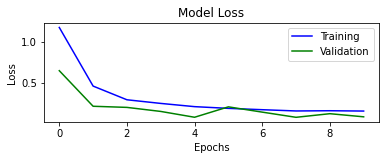

In [8]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')


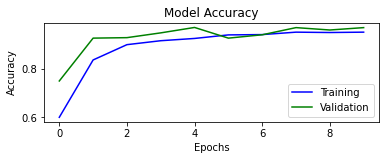

In [9]:
# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

In [7]:
model.save("CNN-model")

INFO:tensorflow:Assets written to: CNN-model\assets


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 112, 112, 100)     2600      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 100)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 100)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 250)       625250    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 250)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 250)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)             

In [2]:
#Model 3
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_3"

model=Sequential()

model.add(Conv2D(32,(3,3),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15,activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])
model.summary()

Epoch 1/10
6120/6120 [==============================] - 283s 46ms/step - loss: 1.6020 - accuracy: 0.4731 - val_loss: 0.4924 - val_accuracy: 0.8359
Epoch 2/10
6120/6120 [==============================] - 287s 47ms/step - loss: 0.4234 - accuracy: 0.8541 - val_loss: 0.2826 - val_accuracy: 0.9026
Epoch 3/10
6120/6120 [==============================] - 238s 39ms/step - loss: 0.2633 - accuracy: 0.9073 - val_loss: 0.2255 - val_accuracy: 0.9190
Epoch 4/10
6120/6120 [==============================] - 262s 43ms/step - loss: 0.1964 - accuracy: 0.9330 - val_loss: 0.1668 - val_accuracy: 0.9431
Epoch 5/10
6120/6120 [==============================] - 246s 40ms/step - loss: 0.1996 - accuracy: 0.9313 - val_loss: 0.1365 - val_accuracy: 0.9556
Epoch 6/10
6120/6120 [==============================] - 244s 40ms/step - loss: 0.1562 - accuracy: 0.9457 - val_loss: 0.2669 - val_accuracy: 0.9046
Epoch 7/10
6120/6120 [==============================] - 238s 39ms/step - loss: 0.1532 - accuracy: 0.9525 - val_loss: 0

In [ ]:
#Testing predictions on model
from tensorflow.keras.preprocessing import image

def prediction(img):
    img = image.img_to_array(img)
    img = img.reshape(-1, 224, 224, 1)
    img = img.astype('float32')
    img = img/255.0
    
    return np.argmax(model.predict(img),axis=-1)[0]
    
labels=["Ulmus carpinifolia","Acer","Salix aurita","Quercus","Alnus incana","Betula pubescens","Salix alba 'Sericea", "Populus tremula","Ulmus glabra","Sorbus aucuparia","Salix sinerea","Populus","Tilia","Sorbus intermedia","Fagus silvatica"]
path = "samples/1.tif"
img = image.load_img(path,target_size=(224,224),grayscale=True)
print(labels[prediction(img)])

In [ ]:
#Model 4- ALEXNET 
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME = "AlexNet_Model"

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=256, input_shape=X.shape[1:], kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384,kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
          

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y, epochs=40, batch_size=1, validation_split=0.2, callbacks=[tensorboard])
model.summary()